## Binary Classification with the MNIST Dataset

Let’s deep dive into the MNIST dataset, where you have to handle the next subqueries:

 1) Load the data as arrays and split them into training and test sets with the next ratio: 85-15. Verify
    that all the classes have the adequate number of instances.
 2) Depict the first 8 images of the created training and test sets using different subplots in a 2 by 4 frame,
    with their labels as titles.
 3) Weneed to handle a classification problem of distinguishing between two classes: even and odd numbers.
    First, create the training and test subsets for each class. Then, choose a binary classifier and a normal
    ization technique of your choice, before wrapping them into a scikit-learn pipeline. Fit your pipeline to
    observe the created diagram.
 4) Use 3-fold cross validation and evaluate your classification pipeline by calculating the next metrics: ac
    curacy, recall, and precision. Compare the predictive performance of your model against a dummy model
    that always guesses that an image belongs to the even category.
 5) Calculate the confusion matrix for the training set, following the same 3-fold cross validation protocol.
    Record the kind and the amount of the predictions based on that.
 6) Train the same pipeline over all the training set, and apply that on the test set for getting your predic
    tions. Extract again the confusion matrix, and comment any great changes in the behavior of your model.
 7) Pick one random instance from those that belong to false positives and false negatives from the test
    set, and depict their original images in separate figures.

### Solution:

1.

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import zipfile
import tempfile

In [3]:
#load the data
from sklearn.datasets import fetch_openml
#setas_frame=False to get the data as NumPy arrays 
mnist = fetch_openml('mnist_784', version=1, parser="auto", as_frame=False)
mnist.keys()

X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

There are 70,000 images in the dataset. For the MNIST dataset, the images are 28x28 pixels, so each image has 784 pixels.

In [4]:
#split data into training and test sets with the next ratio: 85-15
from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs use random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y,  random_state=42)

In [5]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 59500
Testing set size: 10500


In [6]:
#Verify that all the classes have the adequate number of instances
train_instances= round(pd.Series(y_train).value_counts() ,3)
print("Number of instances in train set for each class:")
print(train_instances.sort_index())

Number of instances in train set for each class:
0    5868
1    6695
2    5942
3    6070
4    5800
5    5366
6    5845
7    6199
8    5801
9    5914
Name: count, dtype: int64


In [7]:
test_instances= round(pd.Series(y_test).value_counts(),3)
print("Number of instances in test set for each class:")
print(test_instances.sort_index())

Number of instances in test set for each class:
0    1035
1    1182
2    1048
3    1071
4    1024
5     947
6    1031
7    1094
8    1024
9    1044
Name: count, dtype: int64


2.

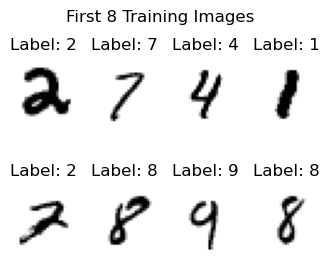

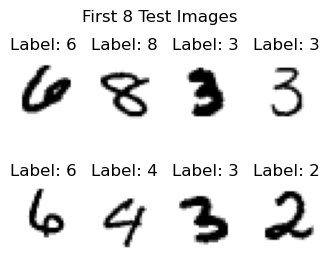

In [8]:
import matplotlib.pyplot as plt

# Define a function to plot images in a 2x4 grid
def plot_samples(X, y, title):
    plt.figure(figsize=(4, 3))
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap="binary")
        plt.title(f"Label: {y[i]}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Plot first 8 images of training and test sets
plot_samples(X_train, y_train, "First 8 Training Images")
plot_samples(X_test, y_test, "First 8 Test Images")

3.

In [9]:
#Create subsets for even and odd labels (1 for even, 0 for odd)
y_train_even_odd = (y_train.astype(int) % 2 == 0)  
y_test_even_odd = (y_test.astype(int) % 2 == 0) 

In [10]:
#choose a binary classifier: SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_even_odd)

SGDClassifier(random_state=42)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#choose a binary classifier: SGDClassifier
#normalization technique of your choice: StandardScaler
#wrapping them into a scikit-learn pipeline
pipeline = Pipeline([("scaler", StandardScaler()),  
                     ("classifier", SGDClassifier(random_state=42))]) 
#max_iter in StandardScaler is 1000 by default, which is good for large datasets like MNIST

In [12]:
from sklearn import set_config

#Fit your pipeline to observe the created diagram
pipeline.fit(X_train, y_train_even_odd)
set_config(display='diagram')
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SGDClassifier(random_state=42))])

4.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#scoring_metrics is used to define multiple evaluation metrics for the model
scoring_metrics = ['accuracy', 'precision', 'recall']

In [14]:
from sklearn.model_selection import cross_validate

#Use 3-fold cross validation and evaluate your pipeline by calculating the metrics: accuracy, recall, and precision
cross_validate(pipeline, X_train, y_train_even_odd, cv=3, scoring=scoring_metrics)

{'fit_time': array([21.17522979, 20.35305047, 19.72806168]),
 'score_time': array([0.64880228, 0.52755928, 0.45418882]),
 'test_accuracy': array([0.88086115, 0.88977966, 0.87914083]),
 'test_precision': array([0.8891815 , 0.88625689, 0.87908463]),
 'test_recall': array([0.86556604, 0.89007383, 0.87448728])}

In [15]:
from sklearn.dummy import DummyClassifier
#a dummy model that always guesses that an image belongs to the even category
dummy_clf = DummyClassifier(strategy = 'constant',constant = 1)
dummy_clf.fit(X_train, y_train_even_odd)
print(any(dummy_clf.predict(X_train))) #False for odd numbers, True for even

True


In [16]:
#Compare the predictive performance of your model against the dummy model 
cross_validate(dummy_clf, X_train, y_train_even_odd, cv=3,scoring=scoring_metrics)

{'fit_time': array([0.5694685 , 0.40693665, 0.45143723]),
 'score_time': array([0.07568789, 0.14973283, 0.12224603]),
 'test_accuracy': array([0.49168095, 0.49170574, 0.49170574]),
 'test_precision': array([0.49168095, 0.49170574, 0.49170574]),
 'test_recall': array([1., 1., 1.])}

Accuracy more than 49% means that if it always guesses that an image is an even, it will be right about 49% of the time. Both precision and recall are zero, as it only predicts "even" and thus never identifies any "odd" numbers correctly.

5.

In [17]:
#first need to have a set of predictions
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(pipeline, X_train, y_train_even_odd,cv=3)

In [18]:
#Calculate the confusion matrix for the training set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_even_odd, y_train_pred)
cm

array([[26905,  3339],
       [ 3607, 25649]], dtype=int64)

The first row of this matrix considers odd(1,3,5,7,9) images (the negative class): 26734 of the pictures were correctly classified as odd (they are called true negatives), while the remaining 3395 were wrongly classified as even (false positives, also called type I errors). The second row considers the images of even(0,2,4,6,8) (the positive class): 3507 were wrongly classified as odd (false negatives, also called type II errors), while the remaining 25864 were correctly classified as even (true positives).

In [19]:
#or using indexing 
print("True Negatives (Odd Numbers Classified Correctly):",cm[0][0])
print("False Positives (Odd Numbers Misclassified as Even):",cm[0][1]) #type I errors
print("False Negatives (Even Numbers Misclassified as Odd):",cm[1][0]) # type II errors
print("True Positives (Even Numbers Classified Correctly):",cm[1][1])

True Negatives (Odd Numbers Classified Correctly): 26905
False Positives (Odd Numbers Misclassified as Even): 3339
False Negatives (Even Numbers Misclassified as Odd): 3607
True Positives (Even Numbers Classified Correctly): 25649


6.

In [20]:
# Train pipeline on the entire training set
pipeline.fit(X_train, y_train_even_odd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SGDClassifier(random_state=42))])

In [21]:
#apply that on the test set for getting your predictions
y_test_pred = pipeline.predict(X_test)

In [22]:
#Extract again the confusion matrix
cm2 = confusion_matrix(y_test_even_odd, y_test_pred)
print("Confusion Matrix:\n", cm2)

Confusion Matrix:
 [[4766  572]
 [ 572 4590]]


The number of true negatives is: 4766

The number of true positives is: 4590

The number of false positives is: 572

The number of false negatives is: 572

The model shows fewer misclassifications (false positives and false negatives) on the test set and improved predictive accuracy on the unseen data.

7.

In [23]:
import numpy as np

# Identify indices of false positives and false negatives
false_positives = np.where((y_test_pred == 1) & (y_test_even_odd == 0))[0]
false_negatives = np.where((y_test_pred == 0) & (y_test_even_odd == 1))[0]

In [24]:
# Randomly select one instance from each
fp_random = np.random.choice(false_positives)
fn_random = np.random.choice(false_negatives)

In [25]:
# Reshape the selected images to 28x28 for visualization
fp_image = X_test[fp_random].reshape(28, 28)
fn_image = X_test[fn_random].reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

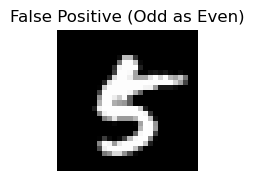

In [26]:
# Plot the false positive image
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(fp_image, cmap='gray')
plt.title("False Positive (Odd as Even)")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

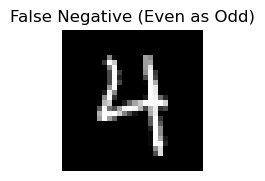

In [27]:
# Plot the false negative image
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 2)
plt.imshow(fn_image, cmap='gray')
plt.title("False Negative (Even as Odd)")
plt.axis("off")

### Conclusion:

The exercise is educational, but it is not meaningless; in fact, it is based on steps that you encounter all the time in real machine learning projects. Let’s see why:

1. Image / Data Processing

MNIST is just a classic dataset with handwritten digits, but the steps you take (loading, splitting, visualization) are the same whether you are working with:

medical images (e.g., tumor detection in X-rays),

images from car cameras (license plate recognition),

product images in e-shops.

So, it is a process that applies everywhere.

2. Transformation into a Simpler Problem

Going from 10 categories (0–9) to 2 categories (even–odd) shows how:

you can reshape a problem to make it more specific,

you work with binary classification, which is the most common scenario in industry (e.g., email = spam or not spam, customer = churn or stay, transaction = fraud or not).

3. Pipelines

Using a pipeline allows you to "tie together" all the steps (normalization, classifier, etc.) into one unified system. This is not theoretical—it is a practical necessity:

It ensures that the same preprocessing is applied both to the training data and to new data.

It allows easy reproducibility and deployment in real systems (e.g., a web app that makes predictions).

4. Cross-validation & Metrics

Evaluation with accuracy, recall, precision, and confusion matrix is essential:

If you are building a healthcare system (e.g., cancer detection), accuracy alone is not enough—recall is crucial (you don’t want to miss sick patients).

If you are building a fraud detection system for a bank, you want high precision (to avoid false alarms).

So, you learn how to correctly evaluate a model depending on the context.

5. Comparison with a Dummy Model

The dummy model ("always predicts even") serves as a baseline:

If your model doesn’t perform better than the dummy → it is useless.

In practice, in every project you must prove that your model truly adds value compared to simple strategies.

6. Error Analysis

Looking at false positives and false negatives is extremely important:

In practice, it helps you see where your model fails.

For example, if you are training an OCR (character recognition), you might find that it confuses “1” with “7” → and then you may decide to improve preprocessing or collect more data for those digits.